# Modul 7 – Aktiviti Jupyter: Machine Learning for Image Processing
Dalam notebook ini, kita akan:
1. Guna **scikit-image** dan **sklearn** untuk preprocessing
2. Ekstrak ciri menggunakan **HOG**
3. Latih model **SVM** dengan dataset **digits** (MNIST-style)
4. Uji model dan visualkan keputusan

## 1. Import Pustaka

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
from skimage.feature import hog
from skimage import exposure

## 2. Muat Turun Dataset Digit dari `sklearn.datasets`

Jumlah imej: 1797


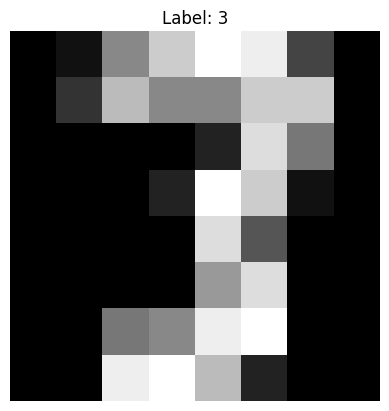

In [27]:
digits = datasets.load_digits()
print("Jumlah imej:", len(digits.images))
plt.imshow(digits.images[23], cmap='gray')
plt.title(f'Label: {digits.target[23]}')
plt.axis('off')
plt.show()

## 3. Ekstrak Ciri HOG daripada Set Imej

In [16]:
features = []
for image in digits.images:
    fd, _ = hog(image, orientations=8, pixels_per_cell=(4, 4),
               cells_per_block=(1, 1), visualize=True)
    features.append(fd)

features = np.array(features)
print("Saiz ciri HOG:", features.shape)

Saiz ciri HOG: (1797, 32)


## 4. Latih Model SVM

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, digits.target, test_size=0.3, random_state=42)

clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
print("Model dilatih.")

Model dilatih.


## 5. Uji Model dan Papar Hasil

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.83      0.85        53
           1       0.96      0.90      0.93        50
           2       0.93      0.89      0.91        47
           3       0.60      0.69      0.64        54
           4       0.78      0.77      0.77        60
           5       0.83      0.82      0.82        66
           6       0.86      0.94      0.90        53
           7       0.84      0.89      0.87        55
           8       0.65      0.70      0.67        43
           9       0.78      0.64      0.70        59

    accuracy                           0.81       540
   macro avg       0.81      0.81      0.81       540
weighted avg       0.81      0.81      0.81       540



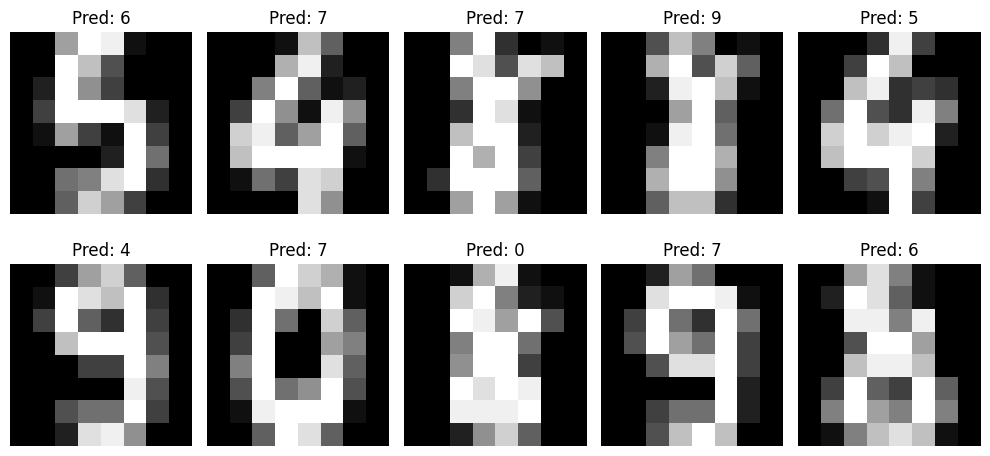

In [15]:
y_pred = clf.predict(X_test)
print("Classification Report:\n", metrics.classification_report(y_test, y_pred))

# Papar imej dengan ramalan
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for ax, img, pred in zip(axes.ravel(), digits.images[-10:], y_pred[-10:]):
    ax.imshow(img, cmap='gray')
    ax.set_title(f'Pred: {pred}')
    ax.axis('off')
plt.tight_layout()
plt.show()